# Token Stats

In [1]:
from collections import Counter
import tqdm.notebook as tqdm

from datasets import load_from_disk

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tldextract import extract

In [2]:
stats = load_from_disk('/media/storage/masters/token-stats')

Loading dataset from disk:   0%|          | 0/240 [00:00<?, ?it/s]

In [3]:
stats

Dataset({
    features: ['id', 'source', 'url', 'subsource', 'tokens'],
    num_rows: 103326730
})

In [4]:
def domain(examples):
    return {'url': [extract(url).suffix if source != 'english-wikipedia' else 'english-wikipedia' for url, source in zip(examples['url'], examples['source'])]}

In [5]:
# Get domains for all URLs
domains = stats.map(domain, batched=True)

# Count domains
domain_counts = Counter(domains['url'])

# Convert to DataFrame for easier analysis
domain_df = pd.DataFrame.from_dict(domain_counts, orient='index', columns=['count'])
domain_df = domain_df.sort_values('count', ascending=False)

Map:   0%|          | 0/103326730 [00:00<?, ? examples/s]

In [6]:

print(f"Total unique domains: {len(domain_df)}")
print("\nTop 20 domains by document count:")
print(domain_df.head(50))

Total unique domains: 1139

Top 20 domains by document count:
                      count
ua                 16899729
com                15523144
com.ua             14849936
                    9622908
english-wikipedia   6407814
gov.ua              4399159
org.ua              3733518
net                 3456866
org                 3410053
in.ua               3021291
info                2939007
ru                  1619909
net.ua              1143614
kiev.ua             1093877
if.ua               1005391
edu.ua              1001031
tv                   896230
media                882512
lviv.ua              805553
news                 569851
te.ua                519549
rv.ua                456791
dp.ua                356095
zp.ua                324135
pl.ua                315587
kr.ua                291839
ck.ua                288298
today                270729
online               257649
cv.ua                249142
vn.ua                246422
cn.ua                230782
pro           

In [5]:
set(stats['source'])

{'cultura-x',
 'english-wikipedia',
 'fineweb-2',
 'hplt-2.0',
 'ubertext2.0',
 'ukrainian-news'}

In [7]:
sources = np.array(stats['source'])
culturax_mask = sources == 'cultura-x'
english_wikipedia_mask = sources == 'english-wikipedia'
fineweb_mask = sources == 'fineweb-2'
hplt_mask = sources == 'hplt-2.0'
ubertext_mask = sources == 'ubertext2.0'
ukrainian_news_mask = sources == 'ukrainian-news'
del sources

In [8]:
tokens = np.array(stats['tokens'], dtype=np.int32)

In [8]:
print('Statistics per source:')
print('-' * 263)
print(f'{"Source":<20} {"Documents":>15} {"Tokens":>20} {"Tokens/Doc":>15} {"Token %":>15} {">1024":>15} {"Tokens >1024":>20} {">2048":>15} {"Tokens >2048":>20} {">4096":>15} {"Tokens >4096":>20} {">8192":>15} {"Tokens >8192":>20}')
print('-' * 263)

total_dataset_tokens = np.sum(tokens)

for name, mask in [
    ('Cultura-X', culturax_mask),
    ('English Wikipedia', english_wikipedia_mask), 
    ('FineWeb 2', fineweb_mask),
    ('HPLT 2.0', hplt_mask),
    ('UberText 2.0', ubertext_mask),
    ('Ukrainian News', ukrainian_news_mask)
]:
    docs = np.sum(mask)
    total_tokens = np.sum(tokens[mask])
    avg_tokens = total_tokens / docs
    tokens_in_source = tokens[mask]
    token_percentage = (total_tokens / total_dataset_tokens) * 100
    
    # Calculate tokens in documents above thresholds
    docs_over_1024 = tokens_in_source > 1024
    docs_over_2048 = tokens_in_source > 2048  
    docs_over_4096 = tokens_in_source > 4096
    docs_over_8192 = tokens_in_source > 8192
    
    tokens_over_1024 = np.sum(tokens_in_source[docs_over_1024])
    tokens_over_2048 = np.sum(tokens_in_source[docs_over_2048])
    tokens_over_4096 = np.sum(tokens_in_source[docs_over_4096])
    tokens_over_8192 = np.sum(tokens_in_source[docs_over_8192])
    
    print(
        f'{name:<20} {docs:>15,} {total_tokens:>20,} {avg_tokens:>15,.1f} {token_percentage:>14.1f}% '
        f'{np.sum(docs_over_1024):>15,} {tokens_over_1024:>20,} '
        f'{np.sum(docs_over_2048):>15,} {tokens_over_2048:>20,} '
        f'{np.sum(docs_over_4096):>15,} {tokens_over_4096:>20,} '
        f'{np.sum(docs_over_8192):>15,} {tokens_over_8192:>20,}'
    )
print('-' * 263)

# Calculate totals
total_docs = len(tokens)  # Since all documents are represented once
total_tokens_all = total_dataset_tokens
avg_tokens_all = total_tokens_all / total_docs

# Calculate total documents above thresholds
docs_over_1024_total = tokens > 1024
docs_over_2048_total = tokens > 2048
docs_over_4096_total = tokens > 4096
docs_over_8192_total = tokens > 8192

tokens_over_1024_total = np.sum(tokens[docs_over_1024_total])
tokens_over_2048_total = np.sum(tokens[docs_over_2048_total])
tokens_over_4096_total = np.sum(tokens[docs_over_4096_total])
tokens_over_8192_total = np.sum(tokens[docs_over_8192_total])

print(
    f'{"Total":<20} {total_docs:>15,} {total_tokens_all:>20,} {avg_tokens_all:>15,.1f} {100:>14.1f}% '
    f'{np.sum(docs_over_1024_total):>15,} {tokens_over_1024_total:>20,} '
    f'{np.sum(docs_over_2048_total):>15,} {tokens_over_2048_total:>20,} '
    f'{np.sum(docs_over_4096_total):>15,} {tokens_over_4096_total:>20,} '
    f'{np.sum(docs_over_8192_total):>15,} {tokens_over_8192_total:>20,}'
)

Statistics per source:
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Source                     Documents               Tokens      Tokens/Doc         Token %           >1024         Tokens >1024           >2048         Tokens >2048           >4096         Tokens >4096           >8192         Tokens >8192
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Cultura-X                 24,942,577       15,002,455,535           601.5           22.7%       3,413,367        8,064,631,995       1,176,667        4,915,610,972         341,753        2,603,739,584          8

In [9]:
# Create a table showing token distribution and percentages
print(f'{"Source":<20} {"Total Tokens":>15} {"% of Total":>12} {"Tokens >4096":>15} {"% >4096":>10}')
print('-' * 76)

total_dataset_tokens = np.sum(tokens)
total_dataset_tokens_over_4096 = np.sum(tokens[tokens > 4096])

for name, mask in [
    ('Cultura-X', culturax_mask),
    ('English Wikipedia', english_wikipedia_mask), 
    ('FineWeb 2', fineweb_mask),
    ('HPLT 2.0', hplt_mask),
    ('UberText 2.0', ubertext_mask),
    ('Ukrainian News', ukrainian_news_mask)
]:
    tokens_in_source = tokens[mask]
    total_tokens = np.sum(tokens_in_source)
    token_percentage = total_tokens / total_dataset_tokens
    
    # Calculate tokens in documents above 4096
    docs_over_4096 = tokens_in_source > 4096
    tokens_over_4096 = np.sum(tokens_in_source[docs_over_4096])
    tokens_over_4096_pct = tokens_over_4096 / total_dataset_tokens_over_4096
    
    print(f'{name:<20} {total_tokens:>15,} {token_percentage:>12.2%} {tokens_over_4096:>15,} {tokens_over_4096_pct:>10.2%}')

print('-' * 76)
total_percentage = total_dataset_tokens / total_dataset_tokens
total_over_4096_pct = total_dataset_tokens_over_4096 / total_dataset_tokens
print(f'{"Total":<20} {total_dataset_tokens:>15,} {total_percentage:>12.2%} {total_dataset_tokens_over_4096:>15,} {total_over_4096_pct:>10.2%}')


Source                  Total Tokens   % of Total    Tokens >4096    % >4096
----------------------------------------------------------------------------
Cultura-X             15,002,455,535       22.72%   2,603,739,584     18.12%
English Wikipedia      6,454,635,868        9.77%   2,038,541,209     14.19%
FineWeb 2             19,114,177,138       28.94%   3,405,783,654     23.70%
HPLT 2.0              20,709,322,905       31.36%   5,728,049,251     39.86%
UberText 2.0           2,904,208,874        4.40%     538,817,610      3.75%
Ukrainian News         1,852,049,111        2.80%      55,874,792      0.39%
----------------------------------------------------------------------------
Total                 66,036,849,431      100.00%  14,370,806,100     21.76%


I need 10B tokens (5B tokens in >4096, 5B tokens in >1024, shorter sequences will be added as a result of truncation of others).

per >1024 and >4096:

* 2.80% of Ukrainian News - 140M tokens
* 9.77% of English Wikipedia - 489M tokens
* 4.40% of UberText 2.0 - 220M tokens
* rest of HPLT 2.0, FineWeb 2 and CulturaX (web sources)

Realistically, I can get:

* 2x Ukrainian News >4096 - 111M tokens
* UberText 2.0 >4096 - 250M tokens
* English Wikipedia >4096 - 489M tokens
* HPLT 2.0 >4096 - 4.15B tokens

* Ukrainian News >1024 - 140M tokens
* UberText 2.0 >1024 - 220M tokens
* English Wikipedia >1024 - 489M tokens
* HPLT 2.0 >1024 - 4.151B tokens

In [10]:
# Create a table showing token distribution and percentages
print(f'{"Source":<20} {"Total Tokens":>15} {"% of Total":>12} {"Tokens 1024-4096":>15} {"% 1024-4096":>10}')
print('-' * 76)

total_dataset_tokens = np.sum(tokens)
total_dataset_tokens_1024_to_4096 = np.sum(tokens[(tokens > 1024) & (tokens <= 4096)])

for name, mask in [
    ('Cultura-X', culturax_mask),
    ('English Wikipedia', english_wikipedia_mask), 
    ('FineWeb 2', fineweb_mask),
    ('HPLT 2.0', hplt_mask),
    ('UberText 2.0', ubertext_mask),
    ('Ukrainian News', ukrainian_news_mask)
]:
    tokens_in_source = tokens[mask]
    total_tokens = np.sum(tokens_in_source)
    token_percentage = total_tokens / total_dataset_tokens
    
    # Calculate tokens in documents between 1024 and 4096
    docs_1024_to_4096 = (tokens_in_source > 1024) & (tokens_in_source <= 4096)
    tokens_1024_to_4096 = np.sum(tokens_in_source[docs_1024_to_4096])
    tokens_1024_to_4096_pct = tokens_1024_to_4096 / total_dataset_tokens_1024_to_4096
    
    print(f'{name:<20} {total_tokens:>15,} {token_percentage:>12.2%} {tokens_1024_to_4096:>15,} {tokens_1024_to_4096_pct:>10.2%}')

print('-' * 76)
total_percentage = total_dataset_tokens / total_dataset_tokens
total_1024_to_4096_pct = total_dataset_tokens_1024_to_4096 / total_dataset_tokens
print(f'{"Total":<20} {total_dataset_tokens:>15,} {total_percentage:>12.2%} {total_dataset_tokens_1024_to_4096:>15,} {total_1024_to_4096_pct:>10.2%}')


Source                  Total Tokens   % of Total Tokens 1024-4096 % 1024-4096
----------------------------------------------------------------------------
Cultura-X             15,002,455,535       22.72%   5,460,892,411     24.70%
English Wikipedia      6,454,635,868        9.77%   2,652,636,911     12.00%
FineWeb 2             19,114,177,138       28.94%   6,282,111,049     28.41%
HPLT 2.0              20,709,322,905       31.36%   6,769,288,194     30.61%
UberText 2.0           2,904,208,874        4.40%     677,194,564      3.06%
Ukrainian News         1,852,049,111        2.80%     270,299,045      1.22%
----------------------------------------------------------------------------
Total                 66,036,849,431      100.00%  22,112,422,174     33.48%


In [11]:
# Create a table showing token distribution and percentages
print(f'{"Source":<20} {"Total Tokens":>15} {"% of Total":>12} {"Tokens 256-1024":>15} {"% 256-1024":>10}')
print('-' * 76)

total_dataset_tokens = np.sum(tokens)
total_dataset_tokens_256_to_1024 = np.sum(tokens[(tokens > 256) & (tokens <= 1024)])

for name, mask in [
    ('Cultura-X', culturax_mask),
    ('English Wikipedia', english_wikipedia_mask), 
    ('FineWeb 2', fineweb_mask),
    ('HPLT 2.0', hplt_mask),
    ('UberText 2.0', ubertext_mask),
    ('Ukrainian News', ukrainian_news_mask)
]:
    tokens_in_source = tokens[mask]
    total_tokens = np.sum(tokens_in_source)
    token_percentage = total_tokens / total_dataset_tokens
    
    # Calculate tokens in documents between 256 and 1024
    docs_256_to_1024 = (tokens_in_source > 256) & (tokens_in_source <= 1024)
    tokens_256_to_1024 = np.sum(tokens_in_source[docs_256_to_1024])
    tokens_256_to_1024_pct = tokens_256_to_1024 / total_dataset_tokens_256_to_1024
    
    print(f'{name:<20} {total_tokens:>15,} {token_percentage:>12.2%} {tokens_256_to_1024:>15,} {tokens_256_to_1024_pct:>10.2%}')

print('-' * 76)
total_percentage = total_dataset_tokens / total_dataset_tokens
total_256_to_1024_pct = total_dataset_tokens_256_to_1024 / total_dataset_tokens
print(f'{"Total":<20} {total_dataset_tokens:>15,} {total_percentage:>12.2%} {total_dataset_tokens_256_to_1024:>15,} {total_256_to_1024_pct:>10.2%}')


Source                  Total Tokens   % of Total Tokens 256-1024 % 256-1024
----------------------------------------------------------------------------
Cultura-X             15,002,455,535       22.72%   5,531,037,470     24.08%
English Wikipedia      6,454,635,868        9.77%   1,471,796,206      6.41%
FineWeb 2             19,114,177,138       28.94%   7,237,371,232     31.51%
HPLT 2.0              20,709,322,905       31.36%   6,656,914,176     28.98%
UberText 2.0           2,904,208,874        4.40%   1,177,595,626      5.13%
Ukrainian News         1,852,049,111        2.80%     897,027,762      3.90%
----------------------------------------------------------------------------
Total                 66,036,849,431      100.00%  22,971,742,472     34.79%


Now thinking about 20B tokens (8B tokens in >4096, 8B tokens in >1024, 4B shorter sequences)

**>4096 (total 8B)**:

* Ukrainian News - 55M tokens (full)
* UberText 2.0 - 539M tokens (full)
* English Wikipedia - 800M tokens
* HPLT 2.0 - 5.7B tokens
* FineWeb 2 - 900M tokens

**>1024 (total 8B)**:

* Ukrainian News - 270M tokens (full)
* UberText 2.0 - 352M tokens
* English Wikipedia - 800M tokens
* HPLT 2.0 - 6.478B tokens

**<1024 (total 4B)**:

* Ukrainian News - 112M tokens
* UberText 2.0 - 176M tokens
* English Wikipedia - 400M tokens
* HPLT 2.0 - 3.3B tokens

In [12]:
# Sample document IDs for each length category
long_docs = tokens > 4096
medium_docs = (tokens > 1024) & (tokens <= 4096)
short_docs = tokens <= 1024

# Create masks for each source in long docs
long_docs_sample = {
    'Ukrainian News': ukrainian_news_mask & long_docs,
    'UberText 2.0': ubertext_mask & long_docs,
    'English Wikipedia': english_wikipedia_mask & long_docs,
    'HPLT 2.0': hplt_mask & long_docs,
    'FineWeb 2': fineweb_mask & long_docs
}

# Create masks for each source in medium docs
medium_docs_sample = {
    'Ukrainian News': ukrainian_news_mask & medium_docs,
    'UberText 2.0': ubertext_mask & medium_docs,
    'English Wikipedia': english_wikipedia_mask & medium_docs,
    'HPLT 2.0': hplt_mask & medium_docs
}

# Create masks for each source in short docs
short_docs_sample = {
    'Ukrainian News': ukrainian_news_mask & short_docs,
    'UberText 2.0': ubertext_mask & short_docs,
    'English Wikipedia': english_wikipedia_mask & short_docs,
    'HPLT 2.0': hplt_mask & short_docs
}

print("\nDocument counts and total tokens in each category:")
print("\n>4096 tokens:")
for source, mask in long_docs_sample.items():
    doc_count = np.sum(mask)
    token_count = np.sum(tokens[mask])
    print(f"{source:<20} {doc_count:>10,} docs, {token_count:>15,} tokens")

print("\n1024-4096 tokens:")
for source, mask in medium_docs_sample.items():
    doc_count = np.sum(mask)
    token_count = np.sum(tokens[mask])
    print(f"{source:<20} {doc_count:>10,} docs, {token_count:>15,} tokens")

print("\n<1024 tokens:")
for source, mask in short_docs_sample.items():
    doc_count = np.sum(mask)
    token_count = np.sum(tokens[mask])
    print(f"{source:<20} {doc_count:>10,} docs, {token_count:>15,} tokens")



Document counts and total tokens in each category:

>4096 tokens:
Ukrainian News            7,474 docs,      55,874,792 tokens
UberText 2.0             50,426 docs,     538,817,610 tokens
English Wikipedia       252,862 docs,   2,038,541,209 tokens
HPLT 2.0                640,881 docs,   5,728,049,251 tokens
FineWeb 2               408,189 docs,   3,405,783,654 tokens

1024-4096 tokens:
Ukrainian News          161,669 docs,     270,299,045 tokens
UberText 2.0            358,438 docs,     677,194,564 tokens
English Wikipedia     1,403,107 docs,   2,652,636,911 tokens
HPLT 2.0              3,800,619 docs,   6,769,288,194 tokens

<1024 tokens:
Ukrainian News        7,006,828 docs,   1,525,875,274 tokens
UberText 2.0          6,022,984 docs,   1,688,196,700 tokens
English Wikipedia     4,751,845 docs,   1,763,457,748 tokens
HPLT 2.0             21,802,985 docs,   8,211,985,460 tokens


In [14]:
# Define target token counts for each category and source
long_targets = {
    # 'Ukrainian News': 55_000_000,
    # 'UberText 2.0': 539_000_000,
    'English Wikipedia': 800_000_000,
    'HPLT 2.0': 5_700_000_000,
    'FineWeb 2': 900_000_000
}

medium_targets = {
    # 'Ukrainian News': 270_000_000,
    'UberText 2.0': 352_000_000, 
    'English Wikipedia': 800_000_000,
    'HPLT 2.0': 6_478_000_000
}

short_targets = {
    'Ukrainian News': 112_000_000,
    'UberText 2.0': 176_000_000,
    'English Wikipedia': 400_000_000,
    'HPLT 2.0': 3_300_000_000
}

# Sample documents to match target token counts
sampled_masks = {
    'long_Ukrainian News': long_docs_sample['Ukrainian News'],
    'long_UberText 2.0': long_docs_sample['UberText 2.0'],
    'medium_Ukrainian News': medium_docs_sample['Ukrainian News'],
}

# Sample long documents
for source, mask in long_docs_sample.items():
    if source in long_targets:
        source_tokens = tokens[mask]
        cumsum = np.cumsum(source_tokens)
        target = long_targets[source]
        idx = np.searchsorted(cumsum, target)
        
        sampled_mask = np.copy(mask)
        sampled_mask[np.cumsum(mask) > idx] = False
        sampled_masks[f'long_{source}'] = sampled_mask

# Sample medium documents        
for source, mask in medium_docs_sample.items():
    if source in medium_targets:
        source_tokens = tokens[mask]
        cumsum = np.cumsum(source_tokens)
        target = medium_targets[source]
        idx = np.searchsorted(cumsum, target)
        
        sampled_mask = np.copy(mask)
        sampled_mask[np.cumsum(mask) > idx] = False
        sampled_masks[f'medium_{source}'] = sampled_mask

# Sample short documents
for source, mask in short_docs_sample.items():
    if source in short_targets:
        source_tokens = tokens[mask]
        cumsum = np.cumsum(source_tokens)
        target = short_targets[source]
        idx = np.searchsorted(cumsum, target)
        
        sampled_mask = np.copy(mask)
        sampled_mask[np.cumsum(mask) > idx] = False
        sampled_masks[f'short_{source}'] = sampled_mask

# Verify sampled amounts
print("\nSampled token and document counts:")

totals = {'long': [0,0], 'medium': [0,0], 'short': [0,0]}
overall_tokens = 0
overall_docs = 0

for name, mask in sorted(sampled_masks.items()):
    token_count = np.sum(tokens[mask])
    doc_count = np.sum(mask)
    print(f"{name:<25} {token_count:>15,} tokens {doc_count:>10,} docs")
    
    prefix = name.split('_')[0]
    totals[prefix][0] += token_count
    totals[prefix][1] += doc_count
    overall_tokens += token_count
    overall_docs += doc_count

print("\nTotals by prefix:")
for prefix, (tokens_sum, docs_sum) in sorted(totals.items()):
    print(f"{prefix:<25} {tokens_sum:>15,} tokens {docs_sum:>10,} docs")

print("\nOverall total:")
print(f"{'all':<25} {overall_tokens:>15,} tokens {overall_docs:>10,} docs")



Sampled token and document counts:
long_English Wikipedia        799,999,924 tokens     98,954 docs
long_FineWeb 2                899,998,666 tokens    107,944 docs
long_HPLT 2.0               5,699,991,342 tokens    637,673 docs
long_UberText 2.0             538,817,610 tokens     50,426 docs
long_Ukrainian News            55,874,792 tokens      7,474 docs
medium_English Wikipedia      799,998,006 tokens    428,984 docs
medium_HPLT 2.0             6,477,997,223 tokens  3,637,045 docs
medium_UberText 2.0           351,998,135 tokens    186,246 docs
medium_Ukrainian News         270,299,045 tokens    161,669 docs
short_English Wikipedia       399,999,948 tokens    973,873 docs
short_HPLT 2.0              3,299,999,599 tokens  8,760,855 docs
short_UberText 2.0            175,999,768 tokens    628,021 docs
short_Ukrainian News          111,999,822 tokens    514,695 docs

Totals by prefix:
long                        7,994,682,334 tokens    902,471 docs
medium                      7,900,2

Tokenized documents: 16636363


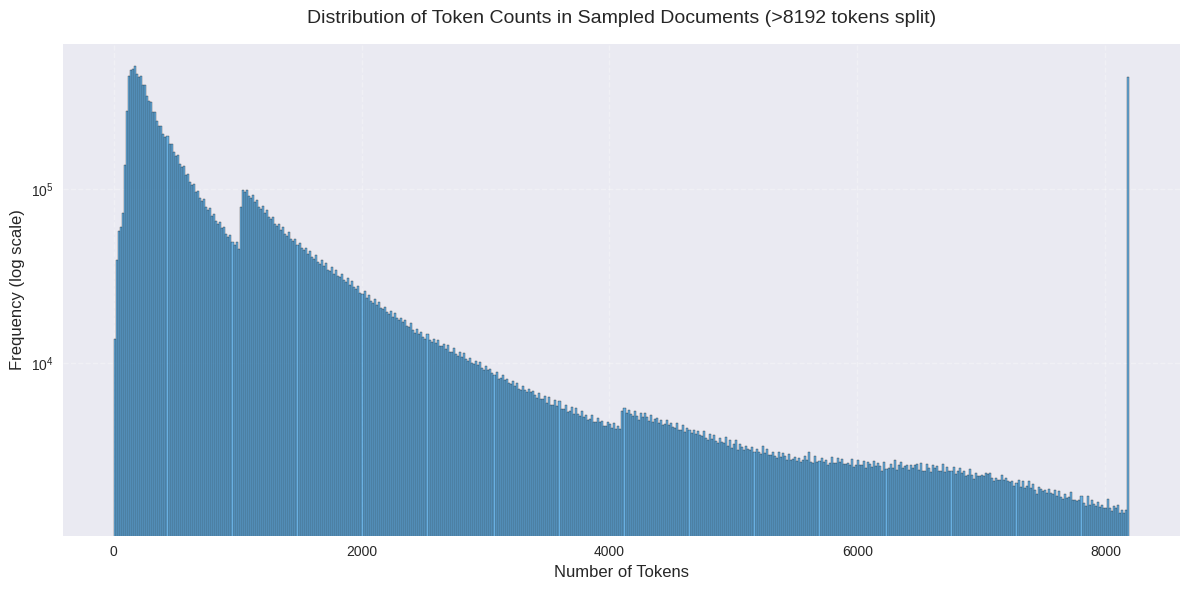

In [15]:
# Collect token counts for sampled documents and split long documents
sampled_tokens = []
for mask in sampled_masks.values():
    doc_tokens = tokens[mask]
    for doc_length in doc_tokens:
        if doc_length > 8192:
            # Split into chunks of 8192
            num_full_chunks = doc_length // 8192
            remainder = doc_length % 8192
            
            # Add the full chunks
            for _ in range(num_full_chunks):
                sampled_tokens.append(8192)
            
            # Add the remainder if it exists
            if remainder > 0:
                sampled_tokens.append(remainder)
        else:
            sampled_tokens.append(doc_length)

print(f'Tokenized documents: {len(sampled_tokens)}')

# Set style for better visualization
plt.style.use('seaborn-v0_8')

# Create figure with specified size
plt.figure(figsize=(12, 6))

# Plot histogram with custom styling
plt.hist(
    sampled_tokens,
    bins=500, 
    edgecolor='black',
    alpha=0.7,
    color='#3498db'
)

# Set y-axis to log scale
plt.yscale('log')

# Customize title and labels
plt.title('Distribution of Token Counts in Sampled Documents (>8192 tokens split)', fontsize=14, pad=15)
plt.xlabel('Number of Tokens', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)

# Add grid with custom styling
plt.grid(True, alpha=0.3, linestyle='--')

# Adjust layout and display
plt.tight_layout()
plt.show()


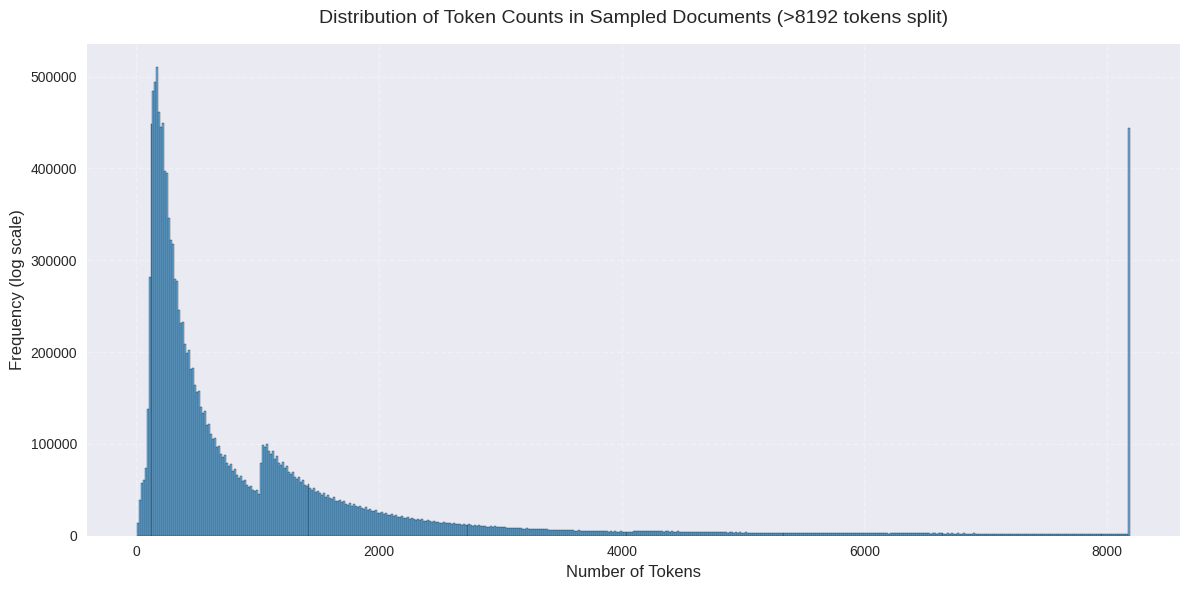

In [14]:
# Collect token counts for sampled documents and split long documents
sampled_tokens = []
for mask in sampled_masks.values():
    doc_tokens = tokens[mask]
    for doc_length in doc_tokens:
        if doc_length > 8192:
            # Split into chunks of 8192
            num_full_chunks = doc_length // 8192
            remainder = doc_length % 8192
            
            # Add the full chunks
            for _ in range(num_full_chunks):
                sampled_tokens.append(8192)
            
            # Add the remainder if it exists
            if remainder > 0:
                sampled_tokens.append(remainder)
        else:
            sampled_tokens.append(doc_length)

# Set style for better visualization
plt.style.use('seaborn-v0_8')

# Create figure with specified size
plt.figure(figsize=(12, 6))

# Plot histogram with custom styling
plt.hist(
    sampled_tokens,
    bins=500, 
    edgecolor='black',
    alpha=0.7,
    color='#3498db'
)

# Set y-axis to log scale
# plt.yscale('log')

# Customize title and labels
plt.title('Distribution of Token Counts in Sampled Documents (>8192 tokens split)', fontsize=14, pad=15)
plt.xlabel('Number of Tokens', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)

# Add grid with custom styling
plt.grid(True, alpha=0.3, linestyle='--')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [14]:
# Check for intersections between masks
combined_mask = np.zeros(len(stats), dtype=bool)
for mask in sampled_masks.values():
    combined_mask &= mask

if np.sum(combined_mask) > 0:
    print(f"Warning: Found {np.sum(combined_mask)} overlapping document indices")
else:
    print("No overlapping document indices found")

# Join all masks into a single mask
combined_mask = np.zeros(len(stats), dtype=bool)
for mask in sampled_masks.values():
    combined_mask |= mask

# Get document IDs from combined mask
sampled_doc_ids = [
    doc_id
    for idx, doc_id in tqdm.tqdm(enumerate(stats['id']), total=combined_mask.shape[0])
    if combined_mask[idx]
]

print(f"Number of sampled documents: {len(sampled_doc_ids)}")

No overlapping document indices found


  0%|          | 0/103326730 [00:00<?, ?it/s]

Number of sampled documents: 16193859


In [15]:
with open('sampled_doc_ids.txt', 'w') as f:
    for doc_id in sampled_doc_ids:
        f.write(f"{doc_id}\n")

In [5]:
tokens_sample = tokens[::10]

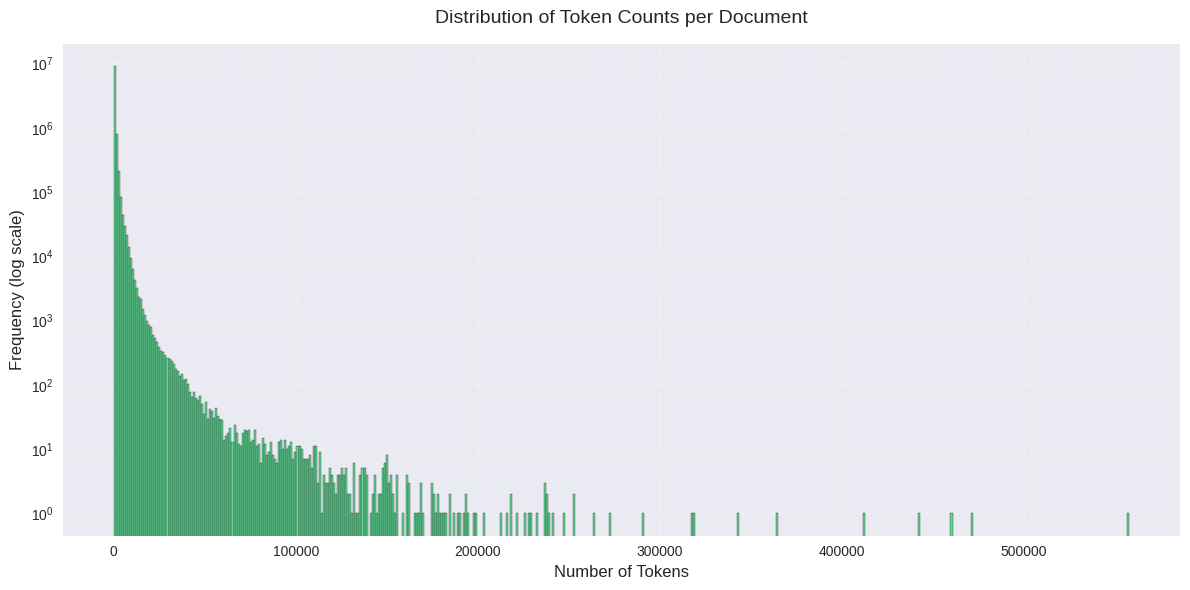

In [7]:
# Set style for better visualization
plt.style.use('seaborn-v0_8')

# Create figure with specified size
plt.figure(figsize=(12, 6))

# Plot histogram with custom styling
plt.hist(
    tokens_sample, 
    bins=500,
    edgecolor='black',
    alpha=0.7,
    color='#2ecc71'
)

# Set y-axis to log scale
plt.yscale('log')

# Customize title and labels with better fonts
plt.title('Distribution of Token Counts per Document', fontsize=14, pad=15)
plt.xlabel('Number of Tokens', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)

# Add grid with custom styling
plt.grid(True, alpha=0.3, linestyle='--')

# Adjust layout and display
plt.tight_layout()
plt.show()

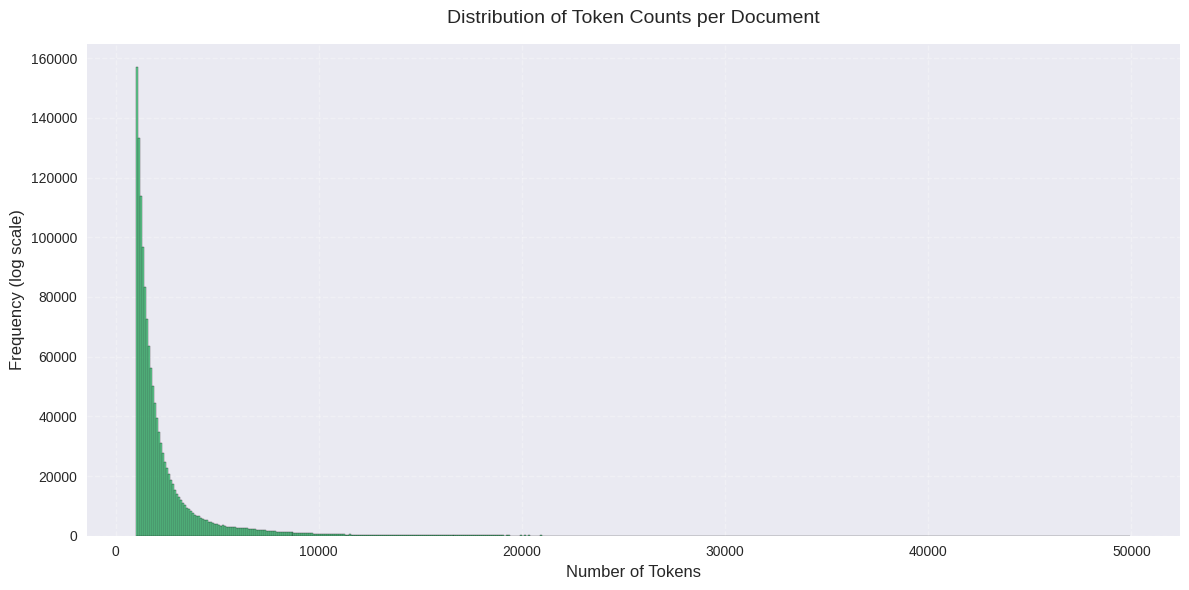

In [8]:
# Set style for better visualization
plt.style.use('seaborn-v0_8')

# Create figure with specified size
plt.figure(figsize=(12, 6))

# Plot histogram with custom styling
plt.hist(
    tokens_sample[np.logical_and(tokens_sample > 1024, tokens_sample < 50000)], 
    bins=500,
    edgecolor='black',
    alpha=0.7,
    color='#2ecc71'
)

# Set y-axis to log scale
# plt.yscale('log')

# Customize title and labels with better fonts
plt.title('Distribution of Token Counts per Document', fontsize=14, pad=15)
plt.xlabel('Number of Tokens', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)

# Add grid with custom styling
plt.grid(True, alpha=0.3, linestyle='--')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [11]:
# Calculate and display the number of documents with more than 1024 tokens
num_docs_over_1024 = np.sum(tokens_sample > 1024)
print(f"Number of documents with more than 1024 tokens: {num_docs_over_1024:,}")
print(f"Percentage of total documents: {(num_docs_over_1024 / len(tokens_sample)) * 100:.2f}%")

Number of documents with more than 1024 tokens: 1,404,320
Percentage of total documents: 13.59%


In [12]:
# Calculate and display the number of documents with more than 8192 tokens
num_docs_over_8192 = np.sum(tokens_sample > 8192)
print(f"Number of documents with more than 8192 tokens: {num_docs_over_8192:,}")
print(f"Percentage of total documents: {(num_docs_over_8192 / len(tokens_sample)) * 100:.2f}%")

Number of documents with more than 8192 tokens: 48,394
Percentage of total documents: 0.47%


In [22]:
thresholds = [1024, 2048, 4096, 6144, 8192, 10240, 12288, 14336, 16384]

for threshold in thresholds:
    print(f'Tokens in documents with more than {threshold} tokens:')
    print(f'{np.sum(tokens[tokens > threshold]):,}\t{np.sum(tokens[tokens > threshold]) / np.sum(tokens):.2%}')
    print()

Tokens in documents with more than 1024 tokens:
36,483,228,274	55.25%

Tokens in documents with more than 2048 tokens:
23,904,176,391	36.20%

Tokens in documents with more than 4096 tokens:
14,370,806,100	21.76%

Tokens in documents with more than 6144 tokens:
10,320,045,135	15.63%

Tokens in documents with more than 8192 tokens:
7,499,262,862	11.36%

Tokens in documents with more than 10240 tokens:
5,718,739,412	8.66%

Tokens in documents with more than 12288 tokens:
4,676,550,523	7.08%

Tokens in documents with more than 14336 tokens:
3,996,622,845	6.05%

Tokens in documents with more than 16384 tokens:
3,450,599,528	5.23%



In [12]:
ukrainian_only = tokens[~english_wikipedia_mask]
ukrainian_only.shape

(96918916,)

In [25]:
percentiles = [50, 70, 80, 90, 95, 99, 99.9]
percentile_values = np.percentile(ukrainian_only, percentiles)

In [26]:
percentile_values

array([  305.,   505.,   715.,  1228.,  1939.,  5304., 16032.])

In [27]:
ukrainian_only_sample = ukrainian_only[::10]

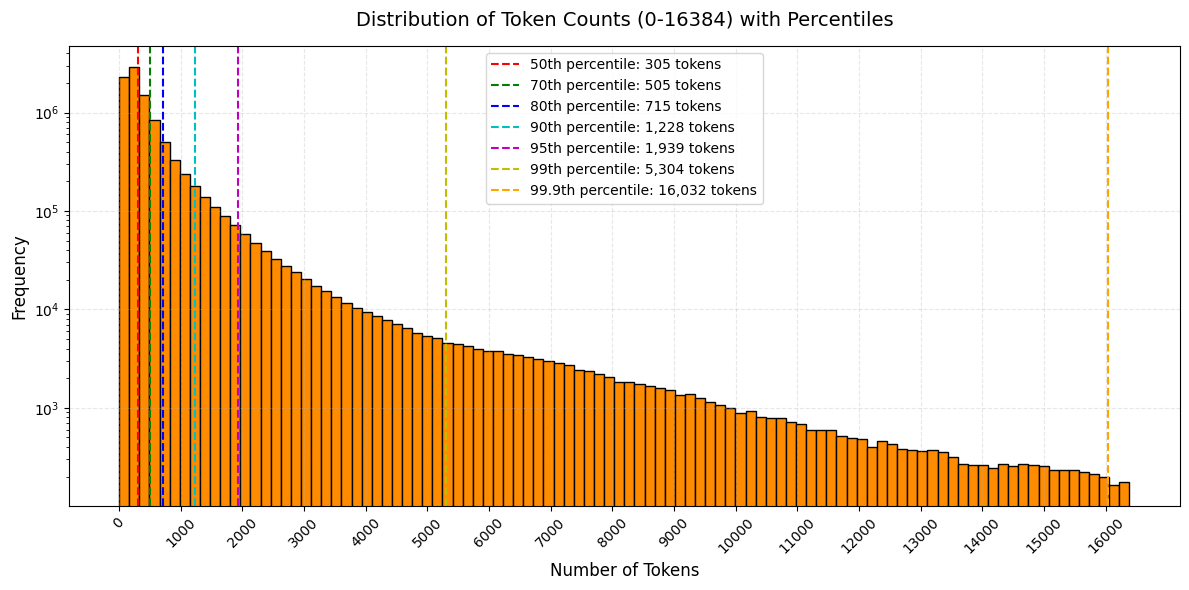


Percentile statistics:
50th percentile: 305 tokens
70th percentile: 505 tokens
80th percentile: 715 tokens
90th percentile: 1,228 tokens
95th percentile: 1,939 tokens
99th percentile: 5,304 tokens
99.9th percentile: 16,032 tokens


In [30]:
# Create histogram
plt.figure(figsize=(12, 6))
plt.hist(ukrainian_only_sample[ukrainian_only_sample <= 16384], bins=100, color='#FF8C00', edgecolor='black')

# Add percentile lines
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'orange']
for percentile, value, color in zip(percentiles, percentile_values, colors):
    plt.axvline(x=value, color=color, linestyle='--', 
                label=f'{percentile}th percentile: {int(value):,} tokens')

plt.title('Distribution of Token Counts (0-16384) with Percentiles', fontsize=14, pad=15)
plt.xlabel('Number of Tokens', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.yscale('log')
plt.xticks(np.arange(0, 16384, 1000), rotation=45)

plt.grid(True, alpha=0.3, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

# Print percentile statistics
print("\nPercentile statistics:")
for percentile, value in zip(percentiles, percentile_values):
    print(f"{percentile}th percentile: {int(value):,} tokens")


In [40]:
sorted_lengths = np.sort(ukrainian_only)[::-1]
cumulative_tokens = np.cumsum(sorted_lengths)

sorted_lengths.shape

(96918916,)

In [41]:
sorted_lengths.min(), sorted_lengths.max()

(5, 1009302)

In [72]:
percentiles = [25, 50, 70, 80, 90, 95]
percentile_y = [((100 - percentile) / 100) * np.sum(sorted_lengths) for percentile in percentiles]
percentile_x = sorted_lengths[np.searchsorted(cumulative_tokens, percentile_y)]
percentile_x

array([  471,  1156,  2480,  4287,  8765, 16770], dtype=int32)

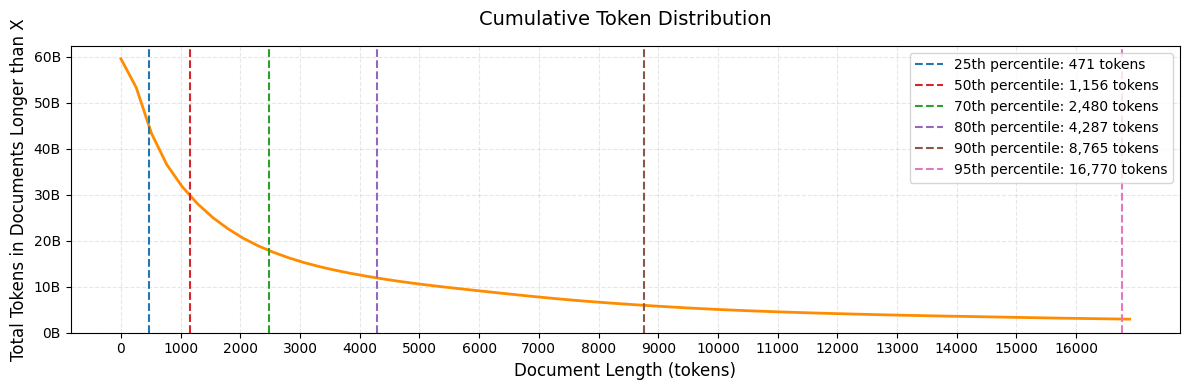

In [ ]:
# Create cumulative histogram
plt.figure(figsize=(12, 4))

x = np.arange(0, 17000, 256)
y = cumulative_tokens[sorted_lengths.shape[0] - np.searchsorted(sorted_lengths[::-1], x) - 1]

plt.plot(x, y, color='#FF8C00', linewidth=2)

# Add percentile lines
colors = ['#1f77b4', '#d62728', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#17becf']
for percentile, value, color in zip(percentiles, percentile_x, colors):
    plt.axvline(x=value, color=color, linestyle='--',
                label=f'{percentile}th percentile: {int(value):,} tokens')

plt.title('Cumulative Token Distribution', fontsize=14, pad=15)
plt.xlabel('Document Length (tokens)', fontsize=12)
plt.ylabel('Total Tokens in Documents Longer than X', fontsize=12)
# plt.yscale('log')
# plt.xscale('log')
plt.xticks(np.arange(0, 17000, 1000))

# Calculate max y value and create appropriate yticks
max_y = np.max(y)
n_ticks = int(np.ceil(max_y / 10e9))
yticks = np.arange(0, (n_ticks + 1) * 10e9, 10e9)
yticklabels = [f'{int(y/1e9)}B' for y in yticks]
plt.yticks(yticks, yticklabels)

plt.grid(True, alpha=0.3, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

In [82]:
plt.figure(figsize=(12, 4))  # Create a new figure
plt.plot(x, y, color='#FF8C00', linewidth=2)

# Add percentile lines again
for percentile, value, color in zip(percentiles, percentile_x, colors):
    plt.axvline(x=value, color=color, linestyle='--',
                label=f'{percentile}th percentile: {int(value):,} tokens')

# plt.title('Cumulative Token Distribution', fontsize=14, pad=15)
plt.xlabel('Document Length (tokens)', fontsize=12)
plt.ylabel('Total Tokens in Documents Longer than X', fontsize=12)
plt.xticks(np.arange(0, 17000, 1000))

# Set yticks again
plt.yticks(yticks, yticklabels)

plt.grid(True, alpha=0.3, linestyle='--')
plt.legend()
plt.tight_layout()

# Save the figure
plt.savefig("cumulative_token_distribution.pdf", format="pdf", bbox_inches='tight')
plt.close()  # Close the figure to free memory